In [2]:
import pandas as pd
from os.path import exists
import matplotlib.pyplot as plt

In [161]:
class GoldAnalysis():
    """
        analysis of the price of gold in relation to the increase in the monetary base.
    """
    def __init__(self):
        try:
            self.df = pd.read_csv(
                filepath_or_buffer=f'../data/df.csv',
                sep=',',
                decimal='.'
            )

        except FileNotFoundError:
            print('O dataframe não existi, ultilize a função creating_dataframe().')

    def creating_monetary_base_dataframe(self):
        df = pd.read_csv(
            filepath_or_buffer='../data/BOGMBASE.csv',
            parse_dates=['DATE'],
            decimal='.',
        )

        df['year'] = df['DATE'].dt.year
        grouped = df.groupby('year')['BOGMBASE'].mean()
        result = grouped.reset_index()
        result = result.rename(
            columns={
                'BOGMBASE': 'average_monetary_base'
            }
        )
        result.drop(
            result.index[[-1, -2, -3, -4, -5, -6]],
            inplace=True,
        )
        self.df_monetary_base = result

    def creating_historic_gold_dataframe(self):
        df = pd.read_csv(
            filepath_or_buffer=r'../data/historic_gold_prices_1833_pres.csv',
            sep=',',
            decimal='.',
        )

        df.drop(
            df.index[:126],
            inplace=True,
        )
        result = df.rename(
            columns={
                'Year': 'year',
                'Average_Price': 'average_gold_price',
            }
        )

        self.df_gold = result

    def creating_dataframe(self):
        if not exists(r'../data/df.csv'):
            self.creating_monetary_base_dataframe()
            self.creating_historic_gold_dataframe()

            df = self.df_gold.join(
                self.df_monetary_base.set_index('year'),
                on='year',
            )

            df.to_csv(
                path_or_buf=r'../data/df.csv',
                index=False,
            )

        else:
            print("O arquivo já existi.")

    def creating_m2_dataframe(self):
        """
            Antes:
                DATE,M2SL
                1959-01-01,286.6
                1959-02-01,287.7
                1959-03-01,289.2
                1959-04-01,290.1
                1959-05-01,292.2
                1959-06-01,294.1
                1959-07-01,295.2
                1959-08-01,296.4
                1959-09-01,296.7
                1959-10-01,296.5
                1959-11-01,297.1
                1959-12-01,297.8

            Depois:
                year, average_m2
                1950, 295.2
        """
        df = pd.read_csv(
            filepath_or_buffer=r'../data/M2SL.csv',
            sep=',',
        )
        # Converta a coluna DATE em tipo de data
        df["DATE"] = pd.to_datetime(df["DATE"])

        # Adicione uma coluna para o ano
        df["year"] = df["DATE"].dt.year

        # Agrupe os dados por ano e calcule a média da coluna M2SL
        grouped = df.groupby("year")["M2SL"].mean()

        # Converte o resultado em um dataframe
        result = grouped.reset_index()

        # Renomeie a coluna resultante
        result = result.rename(columns={"M2SL": "average_m2"})

        # Salve o resultado em uma variável
        self.df_m2 = result

    def increase_in_new_dollar_creation_per_year_in_percentage(self):
        """
            A parti da média do m2 de 1959, quais foram os aumentos 
            tendo como base o m2 do ano anterio.

            Exemplo:
                DATE,M2SL
                1959 ,286.6 - 0%  _
                1960 ,312.4 - 30% _|
                1961 ,335.5 - 10% _|
        """
        self.creating_m2_dataframe()

        for index, value in enumerate(self.df_m2['average_m2']):
            if index > 0:
                year = self.df_m2["year"][index]
                first_value = self.df_m2["average_m2"][0]
                
                start_value = self.df_m2["average_m2"][index-1]
                end_value = self.df_m2["average_m2"][index]
                resultado = (end_value - first_value) / first_value * 100
                
                print(f'{year}: {resultado}')

    def analise(self):
        """
            Aumento do preço do ouro em %,
            Aumento da base monetaria em %.
        """
        if not exists(r'../data/df.csv'):
            self.creating_dataframe

        increase_in_the_monetary_base = [0]
        gold_price_increase = [0]

        for index, value in enumerate(self.df['average_monetary_base']):
            if index > 0:
                year = self.df["year"][index]
                first_value = self.df["average_monetary_base"][0]
                
                start_value = self.df["average_monetary_base"][index-1]
                end_value = self.df["average_monetary_base"][index]
                result = (end_value - first_value) / first_value

                increase_in_the_monetary_base.append(result)

        for index, value in enumerate(self.df['average_gold_price']):
            if index > 0:
                year = self.df["year"][index]
                first_value = self.df["average_gold_price"][0]
                
                start_value = self.df["average_gold_price"][index-1]
                end_value = self.df["average_gold_price"][index]
                result = (end_value - first_value) / first_value
                
                gold_price_increase.append(result)

        self.df['increase_in_the_monetary_base_%'] = increase_in_the_monetary_base
        self.df['gold_price_increase_%'] = gold_price_increase
            
    def grafico_de_linha(self):
        """
            bar()
            hist()
            plot()
            boxplot()
        """
        self.analise()
        
        fig, axes = plt.subplots(
            nrows=1,
            ncols=2,
            figsize=(25, 10),
        )

        # Aumento do preço do ouro em relação ao aumento da base monetaria.
        axes[0].bar(
            self.df['year'],
            self.df['increase_in_the_monetary_base_%'],
            color=(0.2, 0.4, 0.6, 0.6)
        )
        
        axes[0].plot(
            self.df['year'],
            self.df['gold_price_increase_%'],
            'go-',
            label="Gold Price",
            linewidth=1
        )

        # ...
        axes[1].bar(
            self.df['year'],
            self.df['gold_price_increase_%'],
        )

        plt.show()
        # plt.savefig('../img/grafico_de_linha.png')
 

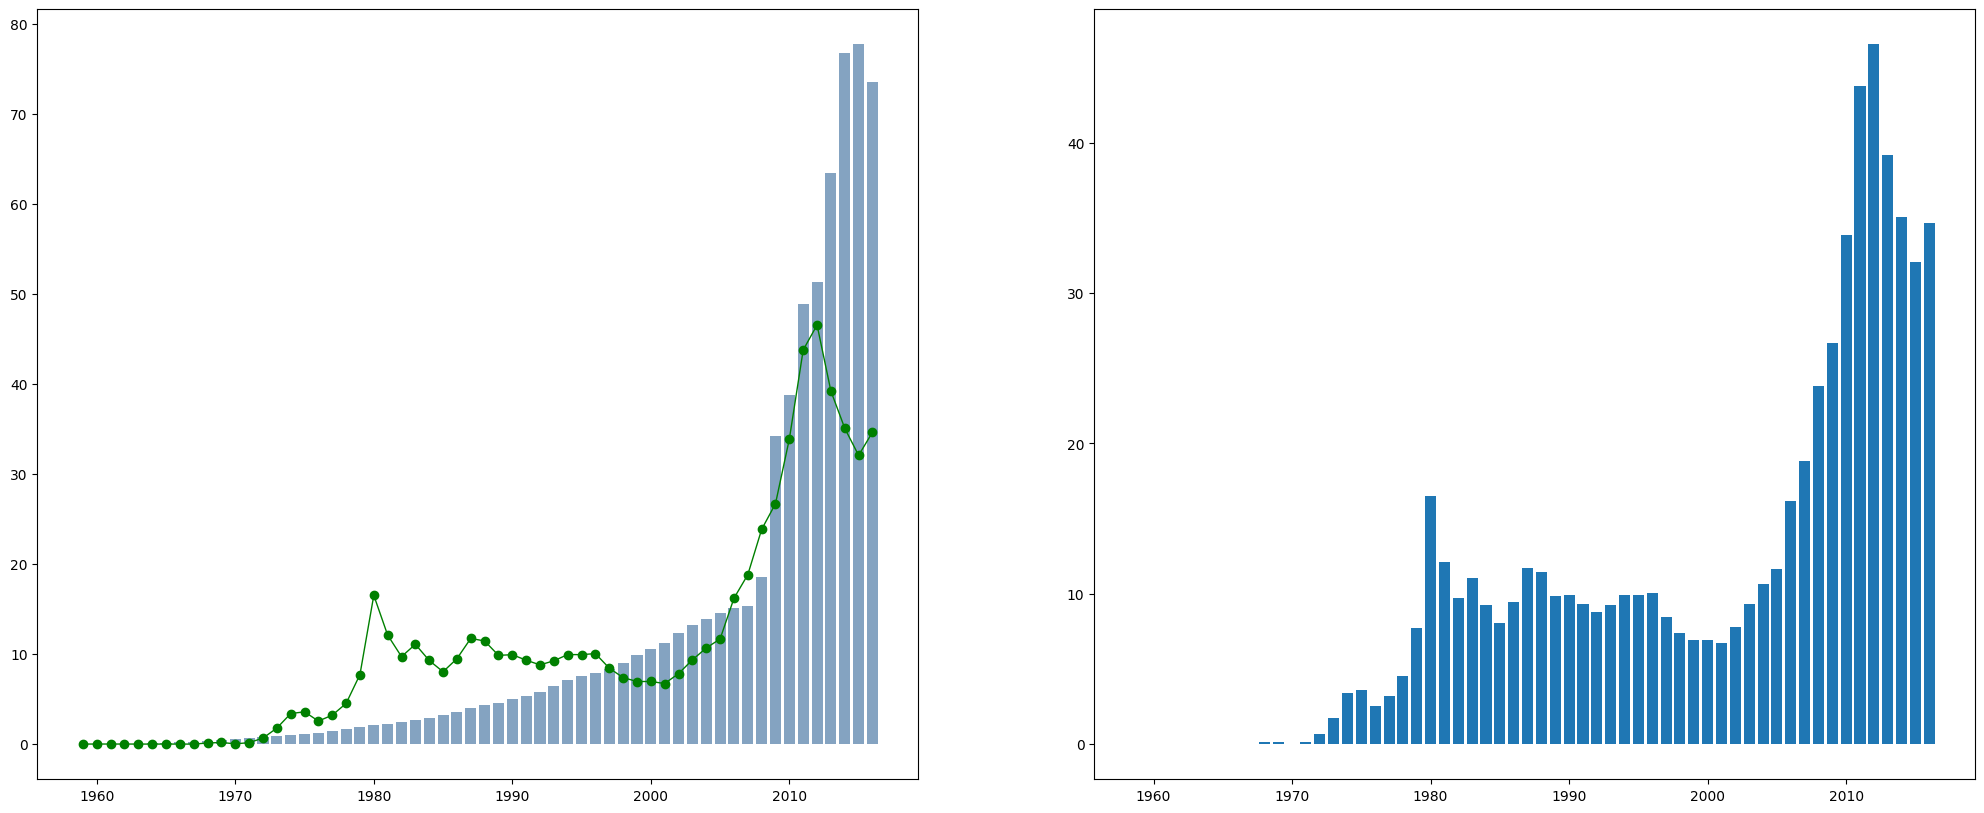

In [162]:
if __name__ == "__main__":
    gold_analysis = GoldAnalysis()
    gold_analysis.grafico_de_linha()
